# TP1 Organización de Datos

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
sb.set(style="whitegrid")

## Leemos el archivo

In [3]:
train = pd.read_csv('train.csv')
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Análisis general

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train['keyword'] = train['keyword'].str.replace('%20', ' ')
train['keyword'].value_counts()

fatalities             45
deluge                 42
armageddon             42
harm                   41
body bags              41
damage                 41
sinking                41
siren                  40
twister                40
windstorm              40
fear                   40
collided               40
evacuate               40
outbreak               40
wrecked                39
weapon                 39
hellfire               39
sinkhole               39
wreckage               39
flames                 39
famine                 39
whirlwind              39
weapons                39
explosion              39
collision              39
derailment             39
earthquake             39
sunk                   39
thunder                38
deaths                 38
                       ..
devastated             31
crushed                31
obliterated            31
mayhem                 30
dead                   30
survivors              30
catastrophic           30
avalanche   

In [7]:
train['location'].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Australia                        18
Chicago, IL                      18
California                       17
Everywhere                       15
California, USA                  15
New York, NY                     15
San Francisco                    14
Florida                          14
United Kingdom                   14
Los Angeles                      13
Washington, D.C.                 13
Indonesia                        13
Ireland                          12
Toronto                          12
NYC                         

## Limpiamos los datos para agrupar aquellos que refieren a la misma location pero de distinta forma
Tomamos en cuenta aquellos que tienen más de 10 tweets

In [8]:
train['location'] = train['location'].str.replace('United States', 'USA', case=False)
train['location'] = train['location'].replace('US', 'USA')
train['location'].value_counts().head(40)

USA                  163
New York              71
London                45
Canada                29
Nigeria               28
UK                    27
Los Angeles, CA       26
India                 24
Mumbai                22
California, USA       21
Washington, DC        21
Kenya                 20
Worldwide             19
Chicago, IL           18
Australia             18
California            17
New York, NY          15
Everywhere            15
United Kingdom        14
San Francisco         14
Florida               14
Indonesia             13
Washington, D.C.      13
Los Angeles           13
NYC                   12
Toronto               12
Ireland               12
San Francisco, CA     11
Seattle               11
Chicago               11
Earth                 11
New York City         10
Sacramento, CA        10
London, UK            10
ss                    10
Texas                 10
Atlanta, GA           10
London, England       10
Denver, Colorado       9
Dallas, TX             9


In [9]:
train['location'] = train['location'].str.replace('United Kingdom', 'UK', case=False)
train['location'] = train['location'].str.replace('California, USA', 'California', case=False)
train['location'] = train['location'].str.replace('New York, NY', 'New York', case=False)
train['location'] = train['location'].str.replace('New York ,NY', 'New York', case=False)
train['location'] = train['location'].str.replace('New York, USA', 'New York', case=False)
train['location'] = train['location'].str.replace('New York City', 'New York', case=False)
train['location'] = train['location'].str.replace('NYC', 'New York', case=False)
train['location'] = train['location'].str.replace('Washington, D.C.', 'Washington, DC', case=False)
train['location'] = train['location'].str.replace('Los Angeles, CA', 'Los Angeles', case=False)
train['location'] = train['location'].str.replace('London, UK', 'London', case=False)
train['location'] = train['location'].replace('worldwide', 'Worldwide')
train['location'] = train['location'].replace('Denver, Colorado', 'Devnver, CO')
train['location'] = train['location'].replace('Seattle, WA', 'Seattle')
train['location'] = train['location'].str.replace('Earth', 'Worldwide', case=False)
train['location'] = train['location'].str.replace('Everywhere', 'Worldwide', case=False)
train['location'].value_counts().head(40)

USA                  163
New York             118
Worldwide             57
London                56
UK                    41
Los Angeles           41
California            38
Washington, DC        35
Canada                29
Nigeria               28
India                 24
Mumbai                22
Kenya                 20
Seattle               18
Australia             18
Chicago, IL           18
Florida               14
San Francisco         14
Indonesia             13
Ireland               12
Toronto               12
Chicago               11
San Francisco, CA     11
ss                    10
Atlanta, GA           10
Sacramento, CA        10
London, England       10
Texas                 10
Dallas, TX             9
Devnver, CO            9
Manchester             9
San Diego, CA          9
304                    9
Nashville, TN          9
World                  9
Scotland               8
South Africa           8
Houston, TX            8
Denver, CO             7
Austin, TX             7


In [10]:
train['location'] = train['location'].str.replace('San Francisco, CA', 'San Francisco', case=False)
train['location'] = train['location'].str.replace('London, England', 'London', case=False)
train['location'] = train['location'].str.replace('Chicago, IL', 'Chicago', case=False)
train['location'] = train['location'].replace('World', 'Worldwide')
train['location'].value_counts().head(50)

USA                               163
New York                          118
Worldwide                          66
London                             66
Los Angeles                        41
UK                                 41
California                         38
Washington, DC                     35
Chicago                            30
Canada                             29
Nigeria                            28
San Francisco                      25
India                              24
Mumbai                             22
Kenya                              20
Seattle                            18
Australia                          18
Florida                            14
Indonesia                          13
Toronto                            12
Ireland                            12
Sacramento, CA                     10
ss                                 10
Atlanta, GA                        10
Texas                              10
Manchester                          9
Nashville, T

In [11]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [13]:
ordenado_t = train.sort_values('text')
ordenado_t
i = 650
while i < 700 :
    print (i)
    print (ordenado_t['text'].iloc[i])
    i += 1

650
1) 'Investigators say a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot unlocked a braking system early'
651
1-6 TIX Calgary Flames vs COL Avalanche Preseason 9/29 Scotiabank Saddledome http://t.co/5G8qA6mPxm
652
1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
653
1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr
654
1.9 #Earthquake in 5Km S Of Volcano Hawaii #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
655
1.9 earthquake occurred 15km E of Anchorage Alaska at 00:11 UTC! #earthquake #Anchorage http://t.co/QFyy5aZIFx
656
1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1
657
1/2 of the deaths in red-light running crashes are pedestrians bicyclists &amp; other vehicle occupants that are hit by the red-light ru

In [14]:
ordenado_t.iloc[666]

id                                                       5127
keyword                                                 fatal
location                                             Varanasi
text        11-Year-Old Boy Charged With Manslaughter of T...
target                                                      1
Name: 3589, dtype: object

In [15]:
top_keyword = ordenado_t[ordenado_t['keyword'] == 'fatal']
top_keyword.head(12)

,id,keyword,location,text,target
3609,5152,fatal,NaN,#news #crimes Police ID victim in fatal crash ...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


In [16]:
train['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [17]:
top_keyword = train[train['keyword'] == 'fatalities']
top_keyword

,id,keyword,location,text,target
3616,5162,fatalities,NaN,EXCLUSIVE: In 179 fatalities involving on-duty...,1
3617,5164,fatalities,New York,#NYC #News Legionnaires death toll rises to 8 ...,1
3618,5165,fatalities,"New York ,NY",Let's fraction the vital need for Our fataliti...,0
3619,5166,fatalities,NaN,Las Vegas in top 5 cities for red-light runnin...,0
3620,5168,fatalities,"Corpus Christi, Texas",We are totally unprepared for an EMP attack. B...,1
3621,5169,fatalities,Cape Town,City implores motorists not to speed after mor...,1
3622,5170,fatalities,NaN,@kyrikoni @ExpressandStar Who said veg and fru...,0
3623,5171,fatalities,Wolverhampton/Brum/Jersey,Understand that there are no fatalities as no ...,1
3624,5172,fatalities,"Chamblee, Georgia",As of the 6-month mark there were a total of 6...,1
3625,5174,fatalities,Official Website,#HSE releases annual workplace facilities data...,0


## Correlaciones

### Buscamos alguna relación entre el largo de los Tweets y con su veracidad

In [18]:
pos_col_text = train.columns.get_loc('text')+1
train.insert(loc=pos_col_text, column='len_text', value=train['text'].iloc[:].str.len())
train.head(5)

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1


In [19]:
train['len_text'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: len_text, dtype: float64

In [20]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Plot

Text(0, 0.5, 'Cantidad')

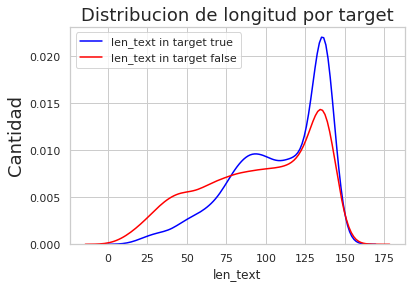

In [21]:
g1 = sb.distplot(train[train['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(train[train['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

Text(0, 0.5, 'Longitud (cantidad de caracteres)')

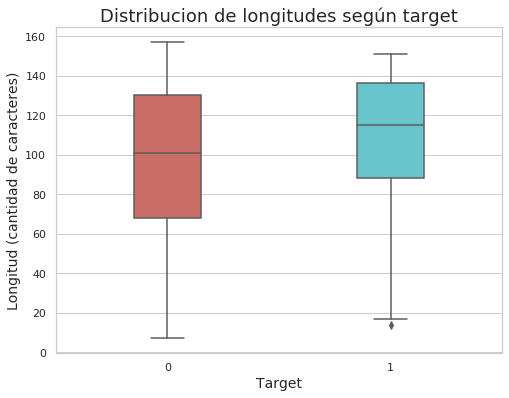

In [22]:
plt.figure(figsize=(8,6))
g = sb.boxplot(x="target", y="len_text", data=train, palette="hls", width=0.3)
g.set_title("Distribucion de longitudes según target", fontsize=18)
g.set_xlabel("Target", fontsize=14)
g.set_ylabel("Longitud (cantidad de caracteres)", fontsize=14)

In [23]:
top_keyword['target'].value_counts()

1    26
0    19
Name: target, dtype: int64

In [24]:
top_keyword['location'].value_counts()

Washington, DC                    1
Official Website                  1
TechFish                          1
Youngstown, OH                    1
Ireland                           1
Washington, DC & Charlotte, NC    1
Hope Road, Jamaica                1
Vancouver BC                      1
San Francisco                     1
Nantes, France                    1
Avon, OH                          1
Cape Town                         1
Lima, Ohio                        1
Just Happy to Be Anywhere         1
Corpus Christi, Texas             1
#WashingtonState #Seattle         1
Chamblee, Georgia                 1
Caserta-Roma, Italy               1
Pekanbaruå¡Batam Islandå¡Medan    1
WestEnd, Puritan Ave              1
Jogja, Indonesia Slowly Asia      1
New York ,NY                      1
St. John's, NL, Canada            1
Wisconsin                         1
USA where it's warm               1
USA                               1
The North                         1
Philadelphia, PA            

### Buscamos relacion entre la zona y la veracidad

In [25]:
true = train[train['target'] == 1]
true

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,110,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,95,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,59,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,79,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,52,1


In [26]:
true['keyword'].value_counts()

derailment           39
wreckage             39
outbreak             39
debris               37
typhoon              37
oil spill            37
suicide bombing      32
suicide bomb         32
rescuers             32
evacuated            32
razed                31
nuclear disaster     31
earthquake           30
suicide bomber       30
airplane accident    30
bridge collapse      29
collision            29
wildfire             29
casualties           28
sandstorm            28
buildings on fire    28
drought              28
mass murder          28
evacuation           28
bombing              27
devastation          27
wild fires           27
forest fires         27
sinkhole             27
hostages             27
                     ..
obliterate            4
harm                  4
screamed              4
crush                 4
obliterated           4
crushed               4
avalanche             4
blizzard              4
panic                 3
collide               3
mayhem          

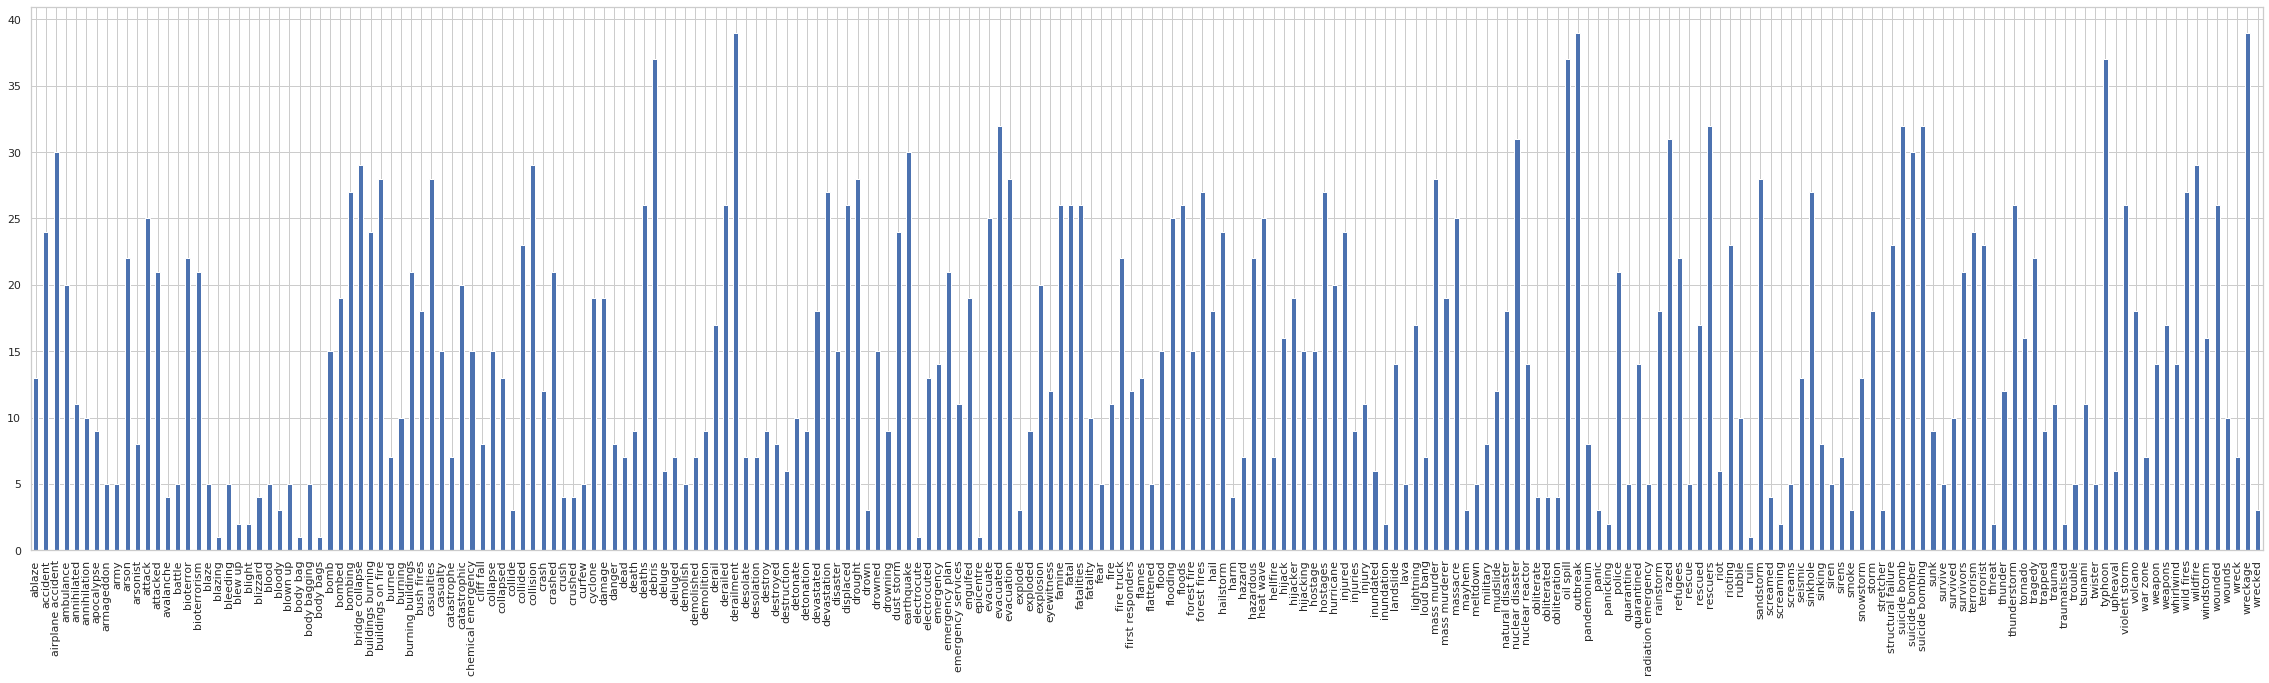

In [27]:
true['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))

In [28]:
false = train[train['target'] == 0]
false

,id,keyword,location,text,len_text,target
15,23,NaN,NaN,What's up man?,14,0
16,24,NaN,NaN,I love fruits,13,0
17,25,NaN,NaN,Summer is lovely,16,0
18,26,NaN,NaN,My car is so fast,17,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,28,0
20,31,NaN,NaN,this is ridiculous....,22,0
21,32,NaN,NaN,London is cool ;),17,0
22,33,NaN,NaN,Love skiing,11,0
23,34,NaN,NaN,What a wonderful day!,21,0
24,36,NaN,NaN,LOOOOOOL,8,0


In [29]:
false['keyword'].value_counts()

body bags              40
harm                   37
armageddon             37
deluge                 36
ruin                   36
wrecked                36
fear                   35
twister                35
siren                  35
explode                35
panic                  34
aftershock             34
screaming              34
crush                  33
traumatised            33
blizzard               33
sinking                33
blazing                33
blaze                  33
body bag               32
hellfire               32
upheaval               32
bloody                 32
curfew                 32
smoke                  31
electrocute            31
blew up                31
collide                31
panicking              31
blood                  30
                       ..
sandstorm               9
inundation              8
terrorist               8
evacuation              8
hailstorm               8
drought                 7
casualties              7
thunderstorm

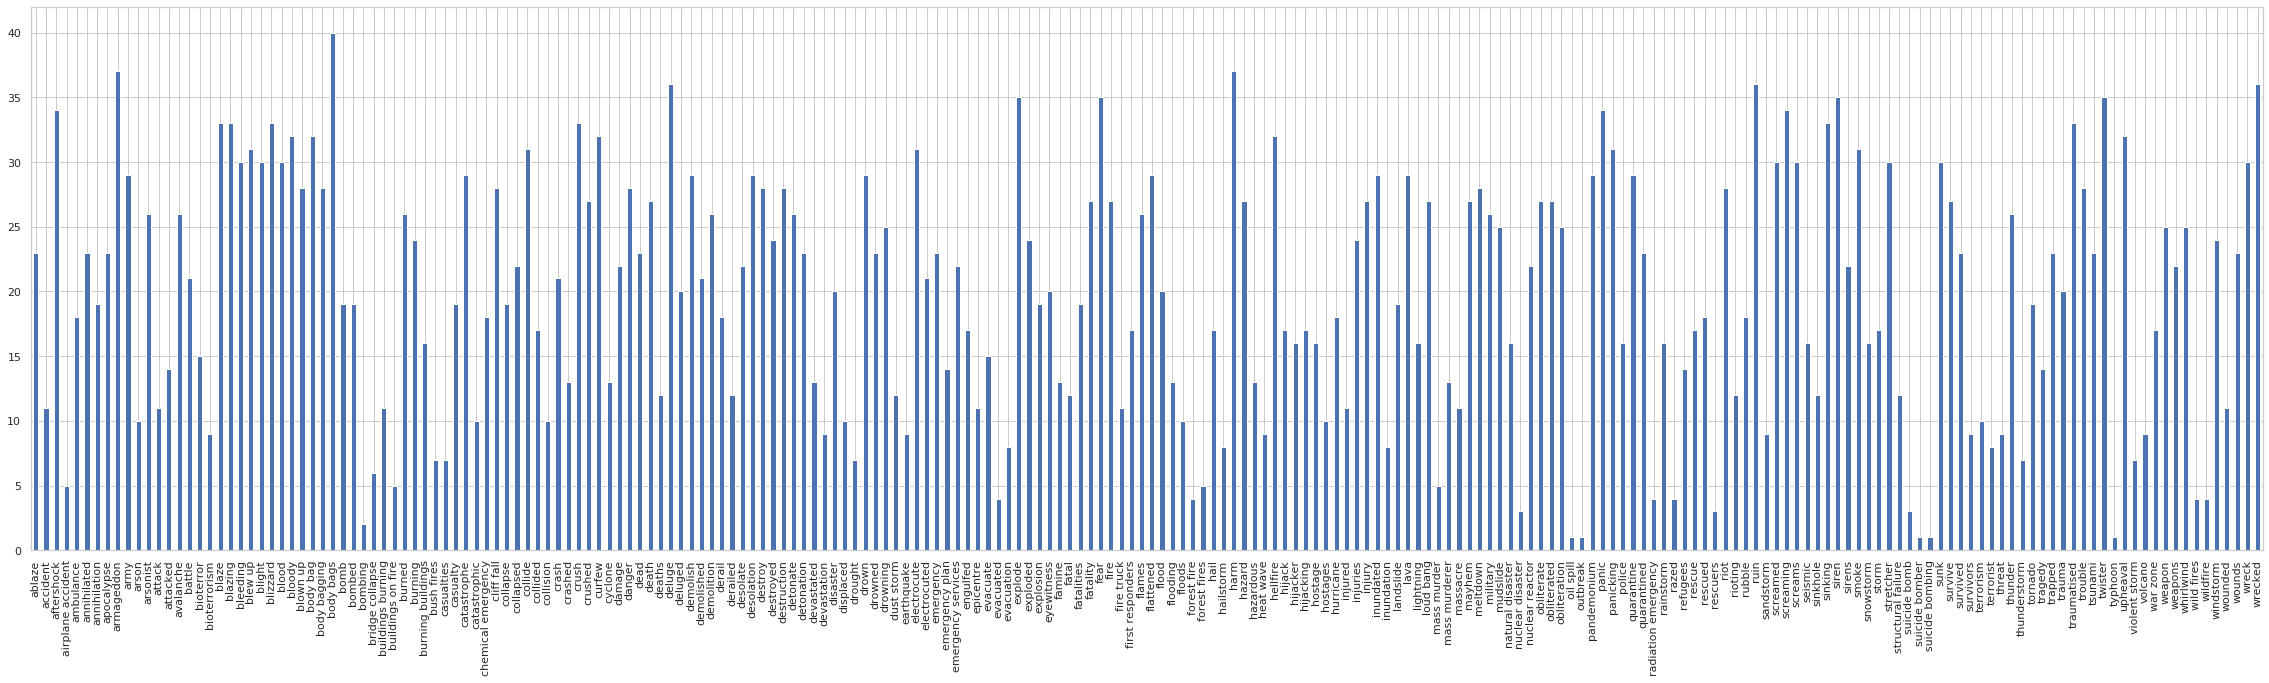

In [30]:
false['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))

Text(0.5, 1.0, 'len vs target')

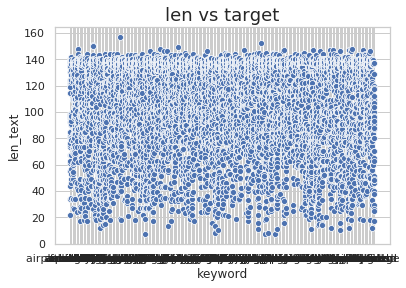

In [31]:
g = sb.scatterplot(x = "keyword", y = "len_text", data = train)
g.set_title("len vs target", fontsize=18)

In [32]:
top_location = train[train['location'] == 'USA']
top_location['target'].value_counts()

1    100
0     63
Name: target, dtype: int64

In [33]:
top_location['keyword'].value_counts()

sandstorm             22
destroyed              7
flood                  6
hazardous              5
hail                   5
wounded                4
aftershock             3
evacuation             3
casualties             3
bioterror              3
suicide bombing        3
lightning              2
wildfire               2
arson                  2
thunderstorm           2
heat wave              2
dead                   2
typhoon                2
battle                 2
rescued                2
survive                2
collapsed              2
exploded               2
wrecked                2
lava                   2
wreck                  2
derailed               2
blizzard               2
fatalities             1
hurricane              1
                      ..
flooding               1
collide                1
eyewitness             1
rubble                 1
hijacker               1
military               1
structural failure     1
death                  1
annihilation           1


Text(0, 0.5, 'Cantidad')

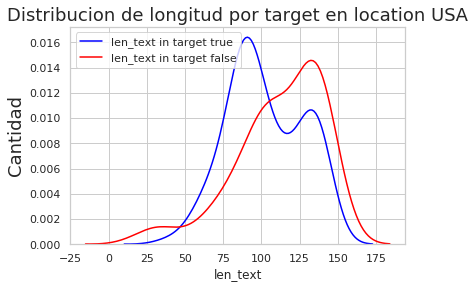

In [34]:
g1 = sb.distplot(top_location[top_location['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_location[top_location['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en location USA", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

Text(0, 0.5, 'len_text')

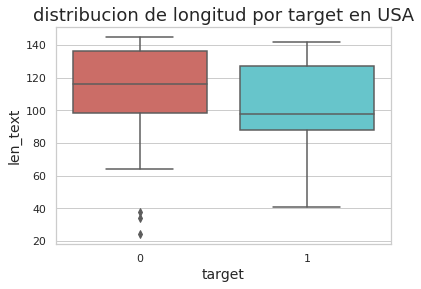

In [35]:
g = sb.boxplot(x="target", y="len_text", 
                     data=top_location, palette="hls")
g.set_title("distribucion de longitud por target en USA", fontsize=18)
g.set_xlabel("target", fontsize=14)
g.set_ylabel("len_text", fontsize=14)

Text(0, 0.5, 'Porcentaje')

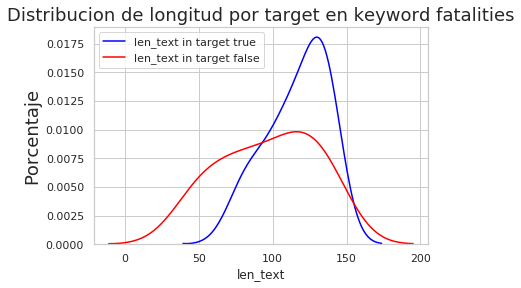

In [36]:
top_keyword = train[train['keyword'] == 'fatalities']
g1 = sb.distplot(top_keyword[top_keyword['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_keyword[top_keyword['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en keyword fatalities", fontsize=18)
g1.set_ylabel("Porcentaje", fontsize=18)

Text(0, 0.5, 'len_text')

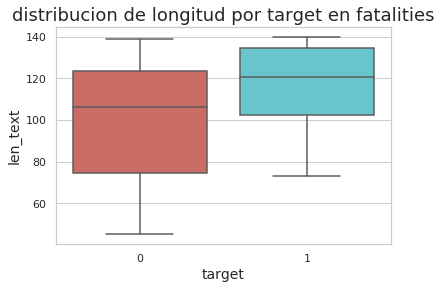

In [37]:
g = sb.boxplot(x="target", y="len_text", 
                     data=top_keyword, palette="hls")
g.set_title("distribucion de longitud por target en fatalities", fontsize=18)
g.set_xlabel("target", fontsize=14)
g.set_ylabel("len_text", fontsize=14)

In [38]:
true['location'].value_counts()

USA                               100
New York                           34
Worldwide                          33
Washington, DC                     24
London                             23
Nigeria                            22
India                              20
UK                                 20
Mumbai                             19
California                         16
Los Angeles                        15
Canada                             13
Chicago                            13
San Francisco                      13
Australia                           9
Indonesia                           8
Toronto                             7
Sacramento, CA                      7
Nashville, TN                       7
Seattle                             7
Devnver, CO                         6
Ireland                             6
Memphis, TN                         5
Atlanta, GA                         5
Pedophile hunting ground            5
Paterson, New Jersey                5
Kenya       

In [39]:
false['location'].value_counts()

New York                          84
USA                               63
London                            43
Worldwide                         33
Los Angeles                       26
California                        22
UK                                21
Chicago                           17
Canada                            16
Kenya                             15
San Francisco                     12
Washington, DC                    11
Seattle                           11
Florida                           11
304                                9
Australia                          9
ss                                 9
Texas                              7
Pennsylvania, USA                  7
Manchester                         7
Nigeria                            6
Ireland                            6
Morioh, Japan                      6
Dallas, TX                         6
San Diego, CA                      6
South Africa                       6
Coventry                           5
T

#### Corrección en location

In [40]:
train['location'] = train['location'].replace('M!$$!$$!PP!', 'Mississippi')

### Agrupamos por location

In [41]:
grouped_by_location = train.groupby(['location']).agg({'target': ['sum', 'count']})
top_10_location_target = grouped_by_location['target'].nlargest(10, 'sum')
top_10_location_target

,sum,count
location,,
USA,100,163
New York,34,118
Worldwide,33,66
"Washington, DC",24,35
London,23,66
Nigeria,22,28
India,20,24
UK,20,41
Mumbai,19,22


In [42]:
grouped_by_location[grouped_by_location[('target', 'count')] >= 8]

target      
                  sum count
location                   
304                 0     9
Atlanta, GA         5    10
Australia           9    18
California         16    38
Canada             13    29
Chicago            13    30
Dallas, TX          3     9
Devnver, CO         6     9
Florida             3    14
Houston, TX         4     8
India              20    24
Indonesia           8    13
Ireland             6    12
Kenya               5    20
London             23    66
Los Angeles        15    41
Manchester          2     9
Mumbai             19    22
Nashville, TN       7     9
New York           34   118
Nigeria            22    28
Sacramento, CA      7    10
San Diego, CA       3     9
San Francisco      13    25
Scotland            4     8
Seattle             7    18
South Africa        2     8
Texas               3    10
Toronto             7    12
UK                 20    41
USA               100   163
Washington, DC     24    35
Worldwide          33    66
ss                  1    10

### Top 10 location vs target

In [43]:
countries = ['USA', 'Australia', 'Canada', 'India', 'Indonesia', 'Ireland', 'Kenya', 'Nigeria', 'UK', 'Scotland', 'South Africa']
grouped_by_country = grouped_by_location.loc[countries]
top_10_countries = grouped_by_country.nlargest(10, ('target', 'count'))
top_10_countries

target      
             sum count
location              
USA          100   163
UK            20    41
Canada        13    29
Nigeria       22    28
India         20    24
Kenya          5    20
Australia      9    18
Indonesia      8    13
Ireland        6    12
Scotland       4     8

Text(0, 0.5, 'Total Tweets')

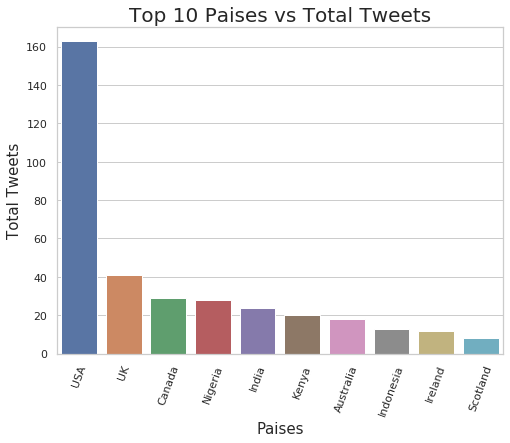

In [44]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries[('target', 'count')])
plt.ylim(0, 170)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Total Tweets", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Total Tweets", fontsize=15)

Text(0, 0.5, 'Tweets verdaderos')

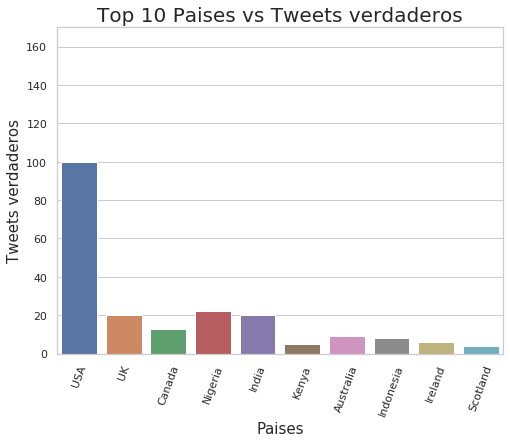

In [45]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries[('target', 'sum')])
plt.ylim(0, 170)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Tweets verdaderos", fontsize=15)

In [46]:
top_10_countries['percentage'] = top_10_countries[('target', 'sum')]/top_10_countries[('target', 'count')]
top_10_countries

target       percentage
             sum count           
location                         
USA          100   163   0.613497
UK            20    41   0.487805
Canada        13    29   0.448276
Nigeria       22    28   0.785714
India         20    24   0.833333
Kenya          5    20   0.250000
Australia      9    18   0.500000
Indonesia      8    13   0.615385
Ireland        6    12   0.500000
Scotland       4     8   0.500000

Text(0, 0.5, 'Porcentaje tweets verdaderos')

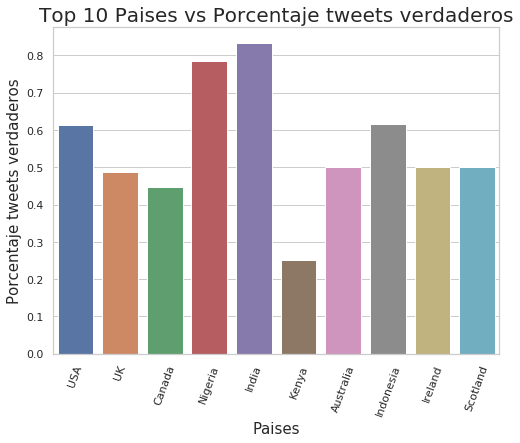

In [47]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries['percentage'])
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Porcentaje tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Porcentaje tweets verdaderos", fontsize=15)

Agregamos estos datos para excluirlos en el próximo plot

In [48]:
countries.append('304')
countries.append('Worldwide')
countries

['USA',
 'Australia',
 'Canada',
 'India',
 'Indonesia',
 'Ireland',
 'Kenya',
 'Nigeria',
 'UK',
 'Scotland',
 'South Africa',
 '304',
 'Worldwide']

In [49]:
grouped_by_city = grouped_by_location.drop(countries, axis=0)
grouped_by_city[grouped_by_city[('target', 'count')] >= 10]

target      
                  sum count
location                   
Atlanta, GA         5    10
California         16    38
Chicago            13    30
Florida             3    14
London             23    66
Los Angeles        15    41
Mumbai             19    22
New York           34   118
Sacramento, CA      7    10
San Francisco      13    25
Seattle             7    18
Texas               3    10
Toronto             7    12
Washington, DC     24    35
ss                  1    10

In [50]:
top_10_cities = grouped_by_city.nlargest(10, ('target', 'count'))
top_10_cities

target      
                  sum count
location                   
New York           34   118
London             23    66
Los Angeles        15    41
California         16    38
Washington, DC     24    35
Chicago            13    30
San Francisco      13    25
Mumbai             19    22
Seattle             7    18
Florida             3    14

Text(0, 0.5, 'Total Tweets')

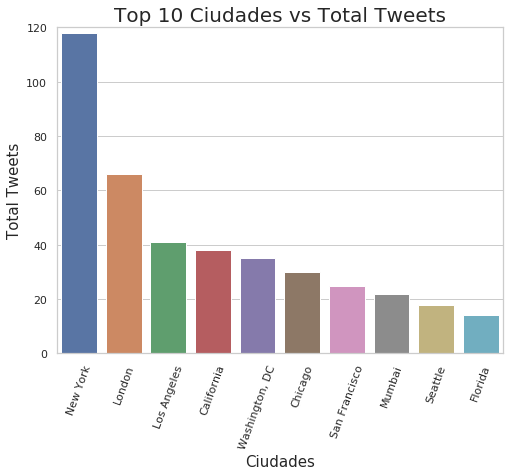

In [51]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities[('target', 'count')])
plt.ylim(0, 120)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Total Tweets", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Total Tweets", fontsize=15)

Text(0, 0.5, 'Tweets verdaderos')

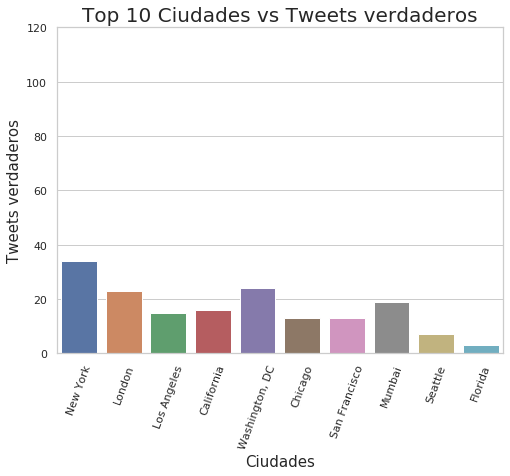

In [52]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities[('target', 'sum')])
plt.ylim(0, 120)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Tweets verdaderos", fontsize=15)

In [53]:
top_10_cities['percentage'] = top_10_cities[('target', 'sum')]/top_10_cities[('target', 'count')]
top_10_cities

target       percentage
                  sum count           
location                              
New York           34   118   0.288136
London             23    66   0.348485
Los Angeles        15    41   0.365854
California         16    38   0.421053
Washington, DC     24    35   0.685714
Chicago            13    30   0.433333
San Francisco      13    25   0.520000
Mumbai             19    22   0.863636
Seattle             7    18   0.388889
Florida             3    14   0.214286

Text(0, 0.5, 'Porcentaje tweets verdaderos')

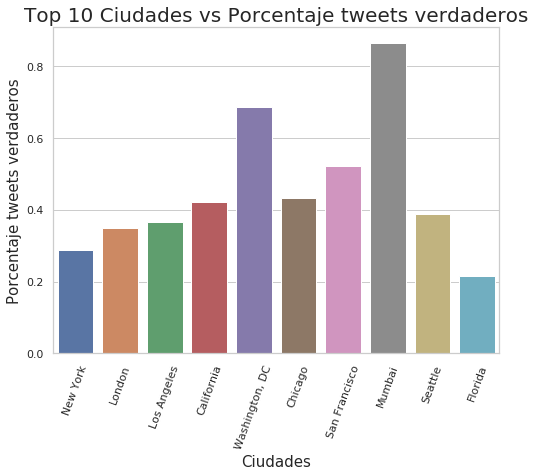

In [54]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities['percentage'])
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Porcentaje tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Porcentaje tweets verdaderos", fontsize=15)

## Top 10 location vs len_text

In [55]:
countries = train[train['location'].isin(top_10_countries.index.tolist())]
countries

,id,keyword,location,text,len_text,target
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,75,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,135,1
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,129,0
73,105,accident,Australia,BigRigRadio Live Accident Awareness,35,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,124,1
106,156,aftershock,USA,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,138,0
115,165,aftershock,USA,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,138,0
124,178,aftershock,USA,&gt;&gt; $15 Aftershock : Protect Yourself and...,130,0
148,212,airplane accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,95,1
158,226,airplane accident,Canada,DTN Brazil: Experts in France begin examining ...,136,1


Text(0, 0.5, 'Largo de tweets')

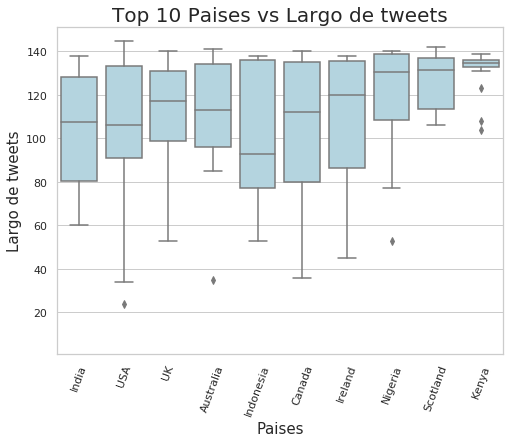

In [56]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=countries, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Largo de tweets", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Largo de tweets", fontsize=15)

In [57]:
countries_true = countries[countries['target'] == 1]
countries_true

,id,keyword,location,text,len_text,target
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,75,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,135,1
73,105,accident,Australia,BigRigRadio Live Accident Awareness,35,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,124,1
148,212,airplane accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,95,1
158,226,airplane accident,Canada,DTN Brazil: Experts in France begin examining ...,136,1
162,235,airplane accident,India,OMG Horrible Accident Man Died in Wings of Air...,75,1
203,287,ambulance,USA,Twelve feared killed in Pakistani air ambulanc...,98,1
382,551,arson,USA,Thousands attend a rally organized by Peace No...,123,1
394,569,arson,USA,Palestinian Teen Killed Amid Protests Against ...,81,1


Text(0, 0.5, 'Largo de tweets verdaderos')

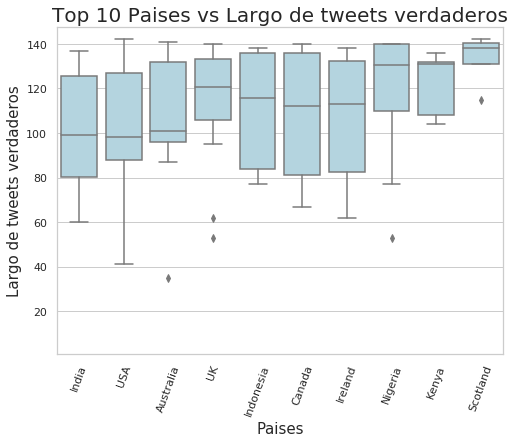

In [58]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=countries_true, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Largo de tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Largo de tweets verdaderos", fontsize=15)

In [59]:
cities = train[train['location'].isin(top_10_cities.index.tolist())]
cities

,id,keyword,location,text,len_text,target
35,53,ablaze,London,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,76,0
66,95,ablaze,San Francisco,@ablaze what time does your talk go until? I d...,85,0
167,242,airplane accident,San Francisco,Statistically I'm at more of risk of getting k...,104,0
169,244,airplane accident,New York,The shooting or the airplane accident https:/...,62,1
181,260,ambulance,Mumbai,If I get run over by an ambulance am I lucky? ...,72,0
211,298,annihilated,New York,Uribe just annihilated that baseball. #Mets,43,0
227,322,annihilated,London,During the 1960s the oryx a symbol of the Arab...,135,1
241,344,annihilated,London,A fun filled happy-hour at Simmons bar in Camd...,138,0
243,346,annihilation,California,@rvfriedmann Hell is just a fraction of his be...,120,1
291,426,apocalypse,San Francisco,@alexandrapullin It is indeed. If the apocalyp...,88,0


Text(0, 0.5, 'Largo de tweets')

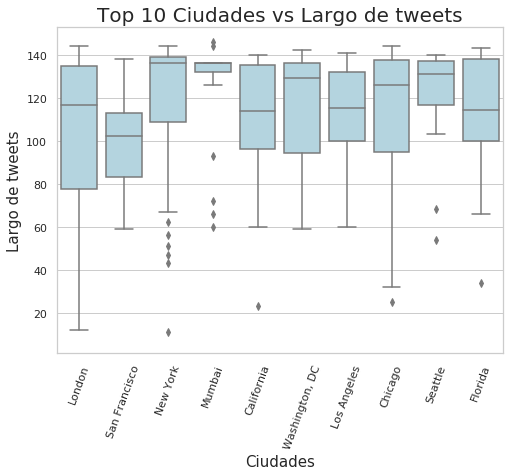

In [60]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=cities, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Largo de tweets", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Largo de tweets", fontsize=15)

In [61]:
cities_true = cities[cities['target'] == 1]
cities_true

,id,keyword,location,text,len_text,target
169,244,airplane accident,New York,The shooting or the airplane accident https:/...,62,1
227,322,annihilated,London,During the 1960s the oryx a symbol of the Arab...,135,1
243,346,annihilation,California,@rvfriedmann Hell is just a fraction of his be...,120,1
317,462,armageddon,California,#PBBan (Temporary:300) hyider_ghost2 @'aRmaged...,98,1
434,630,arsonist,California,Alleged East Bay serial arsonist arrested #San...,80,1
437,635,arsonist,New York,Arsonist Sets NYC Vegetarian Restaurant on Fir...,89,1
471,681,attack,Mumbai,India shud not give any evidence 2 pak.They wi...,144,1
495,717,attacked,London,Christian Attacked by Muslims at the Temple Mo...,122,1
502,727,attacked,San Francisco,Kelly Osbourne attacked for racist Donald Trum...,103,1
547,796,battle,New York,STAR WARS POWER OF THE JEDI COLLECTION 1 BATTL...,126,1


Text(0, 0.5, 'Largo de tweets verdaderos')

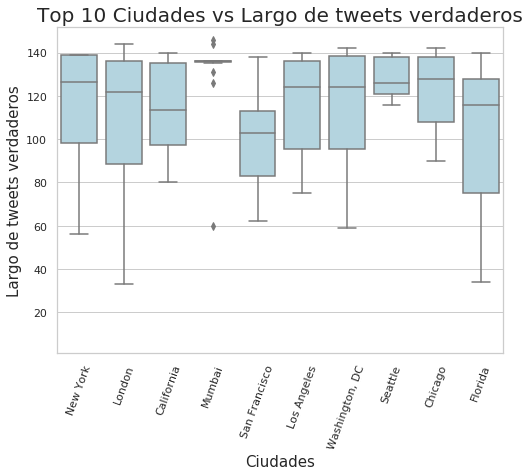

In [62]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=cities_true, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Largo de tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Largo de tweets verdaderos", fontsize=15)

### Top 10 keyword

Text(0, 0.5, 'Cantidad de Tweets')

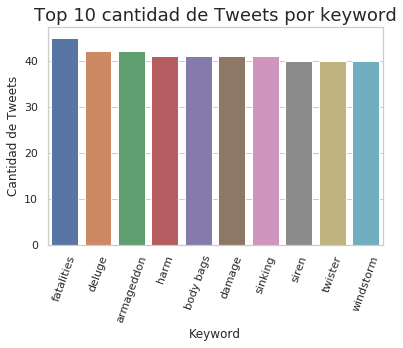

In [63]:
top_10_keyword = train['keyword'].value_counts().nlargest(10)

sb.barplot(x=top_10_keyword.index, y=top_10_keyword)
plt.xticks(rotation=70)
plt.title("Top 10 cantidad de Tweets por keyword", fontsize=18)
plt.xlabel("Keyword")
plt.ylabel("Cantidad de Tweets")

In [64]:
grouped_by_keyword = train.groupby(['keyword']).agg({'target': ['sum', 'count']})
top_10_keyword_target = grouped_by_keyword['target'].nlargest(10, 'count')
top_10_keyword_target

,sum,count
keyword,,
fatalities,26,45
armageddon,5,42
deluge,6,42
body bags,1,41
damage,19,41
harm,4,41
sinking,8,41
collided,23,40
evacuate,25,40


Text(0, 0.5, 'Target')

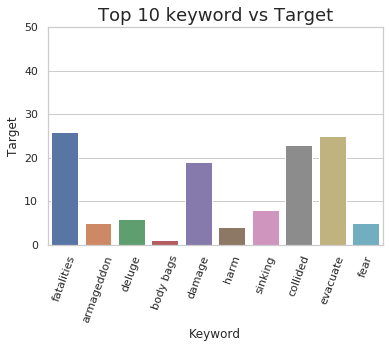

In [65]:
sb.barplot(x=top_10_keyword_target.index, y=top_10_keyword_target['sum'])
plt.ylim(0, 50)
plt.xticks(rotation=70)
plt.title("Top 10 keyword vs Target", fontsize=18)
plt.xlabel("Keyword")
plt.ylabel("Target")

Text(0, 0.5, 'Total Tweets')

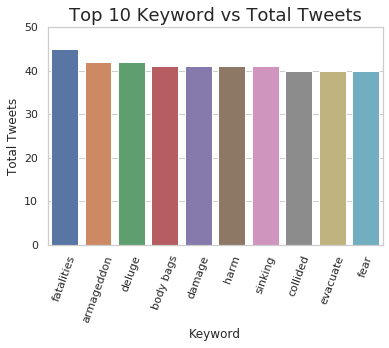

In [66]:
sb.barplot(x=top_10_keyword_target.index, y=top_10_keyword_target['count'])
plt.ylim(0, 50)
plt.xticks(rotation=70)
plt.title("Top 10 Keyword vs Total Tweets", fontsize=18)
plt.xlabel("Keyword")
plt.ylabel("Total Tweets")

### Analizamos los location NaN

In [67]:
train['location'].isnull().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [68]:
location_null = train[train['location'].isnull()]
location_null

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,110,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,95,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,59,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,79,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,52,1


In [69]:
location_null['target'].value_counts()

0    1458
1    1075
Name: target, dtype: int64

In [70]:
location_null['len_text'].value_counts()

136    137
137     71
139     69
138     65
135     59
140     46
132     43
133     40
134     36
114     35
100     35
120     33
79      32
87      32
92      32
126     31
91      30
97      30
89      29
94      28
113     27
73      26
105     26
116     26
124     26
117     26
109     25
88      25
129     25
125     24
      ... 
25       6
57       6
54       6
24       6
31       5
22       5
21       5
145      5
19       4
14       4
7        3
8        3
146      3
17       3
150      2
30       2
13       2
148      2
16       2
12       2
10       2
151      1
9        1
11       1
15       1
23       1
20       1
147      1
149      1
157      1
Name: len_text, Length: 146, dtype: int64

In [71]:
location_null['keyword'].value_counts()

razed                  25
detonation             24
explosion              21
suicide bomber         20
terrorism              19
army                   19
bioterrorism           19
thunder                19
nuclear disaster       19
twister                19
sinking                18
crash                  18
body bags              18
engulfed               18
rescuers               18
blizzard               18
hurricane              17
wrecked                17
famine                 17
military               17
smoke                  17
forest fires           17
hellfire               17
injury                 16
massacre               16
electrocuted           16
quarantined            16
evacuate               16
blood                  16
hijacker               16
                       ..
bloody                  7
blown up                7
evacuation              7
forest fire             7
whirlwind               6
arsonist                6
demolish                6
blight      

In [72]:
location_null['keyword'].isnull().value_counts()

False    2472
True       61
Name: keyword, dtype: int64

Text(0, 0.5, 'Porcentaje')

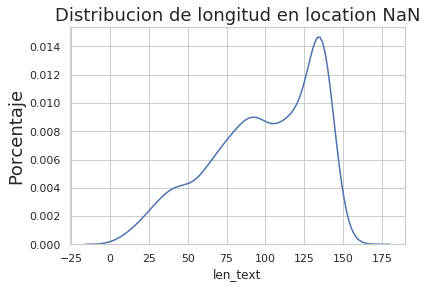

In [73]:
g1 = sb.distplot(location_null['len_text'], hist=False)
#g1 = sb.distplot(top_keyword[top_keyword['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud en location NaN", fontsize=18)
g1.set_ylabel("Porcentaje", fontsize=18)